In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")

### K-Means

In [69]:
# leitura e exclusão de Myanmar
country = pd.read_csv("../data/Country-data.csv", index_col='country')
country.drop(labels="Myanmar", axis=0, inplace=True)

In [70]:
# Definiçao das variáveis para uso nos modelos
X1 = 'income'
X2 = 'gdpp'
vars = ['income', 'gdpp']

#### Usaremos K-Means com as configurações abaixo

In [71]:
model_raw = KMeans(n_clusters=3,
                    n_init=100,
                    max_iter=1000,
                    random_state=42)

# fit e predict do modelo
model_raw.fit(country[vars])
country['clusters'] = model_raw.predict(country[vars])

In [72]:
# clusters encontrados
cluster_0 = country[country['clusters'] == 0]
cluster_1 = country[country['clusters'] == 1]
cluster_2 = country[country['clusters'] == 2]

# visualização do tamanho
print(f"""Cluster 0: {len(cluster_0)}
Cluster 1: {len(cluster_1)}
Cluster 2: {len(cluster_2)}""")

Cluster 0: 127
Cluster 1: 7
Cluster 2: 32


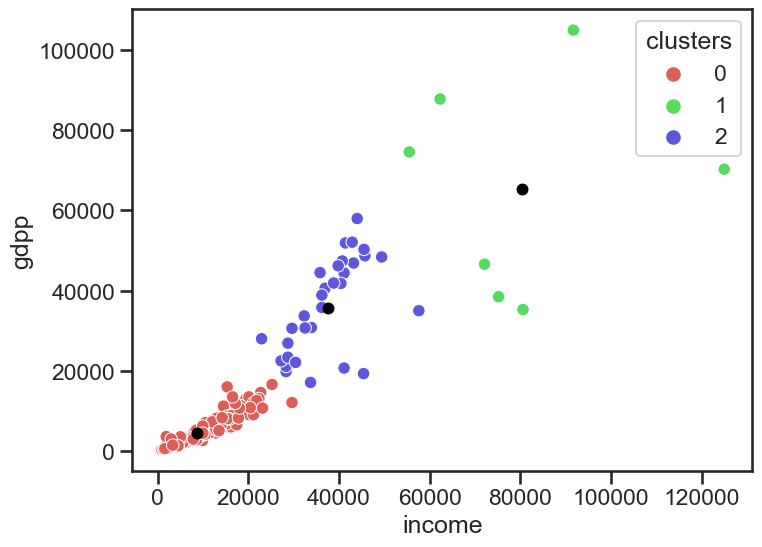

In [73]:
# centroid de cada cluster
centroids = model_raw.cluster_centers_

# plot com cada cluster e seus centroids
plt.figure(figsize = (8,6))
sns.scatterplot(data = country,
                x = X1,
                y = X2,
                hue = country['clusters'],
                palette= sns.color_palette('hls', 3))
plt.scatter(centroids[:,0],
            centroids[:,1],
            c = 'black',
            s = 50)
plt.show()

In [74]:
# melhorar o código usando um FOR, mas vai ficar pra depois
# cálculo das distâncias do ponto mais próximo ao centroid de cada cluster
cluster_0['dist_centro'] = (cluster_0[X1]-centroids[0,0])**2 + (cluster_0[X2]-centroids[0,1])**2
cluster_1['dist_centro'] = (cluster_1[X1]-centroids[0,0])**2 + (cluster_1[X2]-centroids[0,1])**2
cluster_2['dist_centro'] = (cluster_2[X1]-centroids[0,0])**2 + (cluster_2[X2]-centroids[0,1])**2
index_min_0 = cluster_0['dist_centro'][cluster_0['dist_centro'] == cluster_0['dist_centro'].min()].index
index_min_1 = cluster_1['dist_centro'][cluster_1['dist_centro'] == cluster_1['dist_centro'].min()].index
index_min_2 = cluster_2['dist_centro'][cluster_2['dist_centro'] == cluster_2['dist_centro'].min()].index

In [75]:
print(f"""Os 3 países que representam os cluster nos dados originais são:
Cluster 0: {index_min_0[0]}
Cluster 1: {index_min_1[0]}
Cluster 2: {index_min_2[0]}""")

Os 3 países que representam os cluster nos dados originais são:
Cluster 0: Jamaica
Cluster 1: Kuwait
Cluster 2: Czech Republic


#### Os países acima foram os mais próximos encontrados dentro de cada cluster. Analisando eles, Jamaica e Kuwait são países em desenvolvimento, enquanto a República Tcheca está listada nos países desenvolvidos. Os cluster não ficaram bem divididos devido a má distribuição dos dados originais.

____________________________

### Clusterização Hierarquica

In [76]:
# análise para ver a melhor opção entre os métodos de linkage para o modelo te clusterização aglomerativa
linkage = ['ward', 'complete', 'average', 'single']
distribuicao =[]
for i in range(0,4):
    model_aglo = AgglomerativeClustering(n_clusters=3, linkage=linkage[i]).fit(country)
    count = model_aglo.labels_
    distribuicao.append(count)
   
distribuicao = pd.DataFrame(distribuicao)

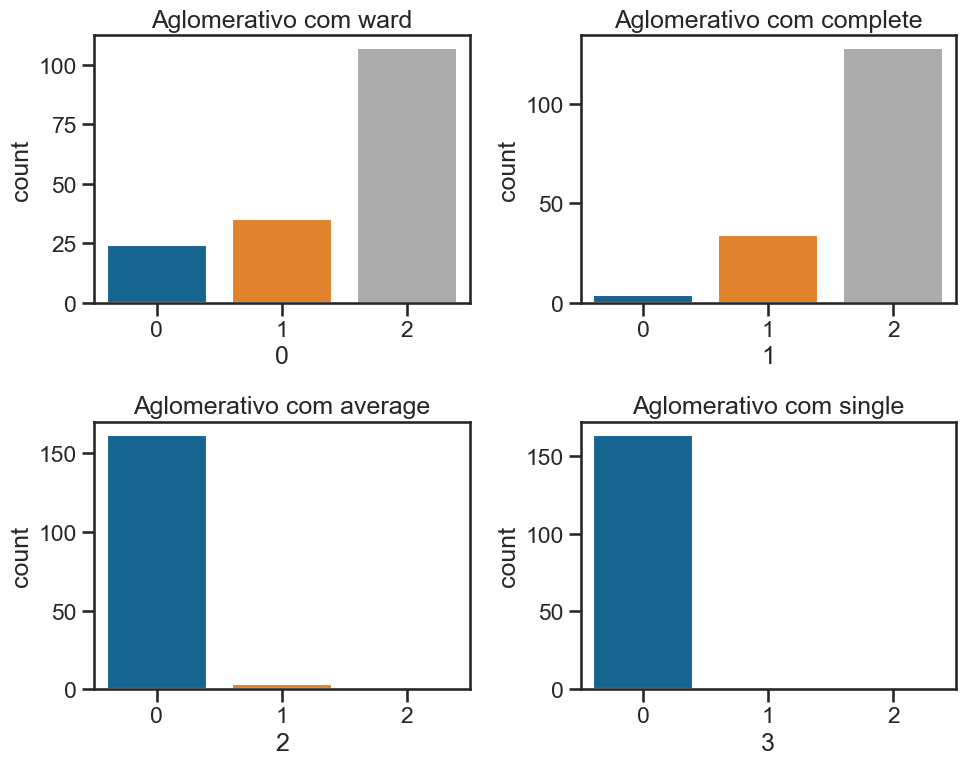

In [77]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(221)
sns.countplot(x=distribuicao.T[0])
ax.set_title('Aglomerativo com ward')

ax = fig.add_subplot(222)
sns.countplot(x=distribuicao.T[1])
ax.set_title('Aglomerativo com complete')

ax = fig.add_subplot(223)
sns.countplot(x=distribuicao.T[2])
ax.set_title('Aglomerativo com average')

ax = fig.add_subplot(224)
sns.countplot(x=distribuicao.T[3])
ax.set_title('Aglomerativo com single')

plt.tight_layout()
plt.show()

#### De acordo com o gráfico acima, podemos ver uma leve melhora no uso do parâmetro "complete" para o algoritmo de clusterização

Text(0, 0.5, 'Distancias')

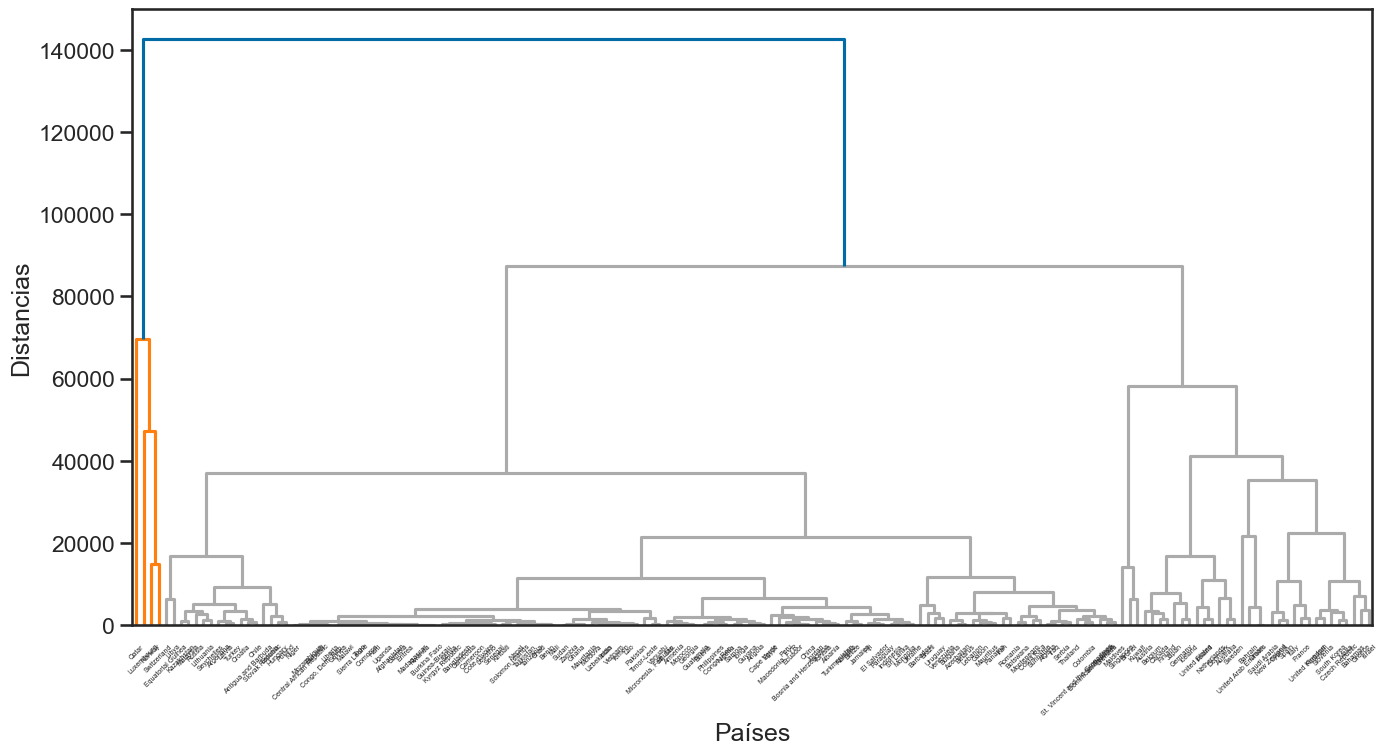

In [78]:
plt.style.use('tableau-colorblind10')
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

linkage = sch.linkage(country, method="complete")
dendrogram = sch.dendrogram(linkage, labels=country.index, leaf_rotation=45)

ax.set_xlabel('Países')
ax.set_ylabel('Distancias')

### No gráfico acima, podemos ver que existem distâncias muito pequenas em boa parte dos países, porem, quanto mais para cima (maior aglomeração), as distâncias vão aumentando significativamente, devido a presença das variáveis 'income' e 'gdpp' originais.

__________________________

#### Abaixo, vamos analisar os medoids. Ao invés de termos centroids de cada cluster e seus pontos mais próximos, os medoidos são os pontos existentes que representam o centro de cada cluster.

In [79]:
# fit e predict do modelo com 3 clusters
model_raw_medoid = KMedoids(n_clusters=3, max_iter=1000, random_state=42)
model_raw_medoid.fit(country[vars])
country['clusters_medoid'] = model_raw_medoid.predict(country[vars])

In [80]:
# clusters encontrados
cluster_0 = country[country['clusters_medoid'] == 0]
cluster_1 = country[country['clusters_medoid'] == 1]
cluster_2 = country[country['clusters_medoid'] == 2]

# visualização do tamanho de cada cluster
print(f"""Cluster 0: {len(cluster_0)}
Cluster 1: {len(cluster_1)}
Cluster 2: {len(cluster_2)}""")

Cluster 0: 32
Cluster 1: 82
Cluster 2: 52


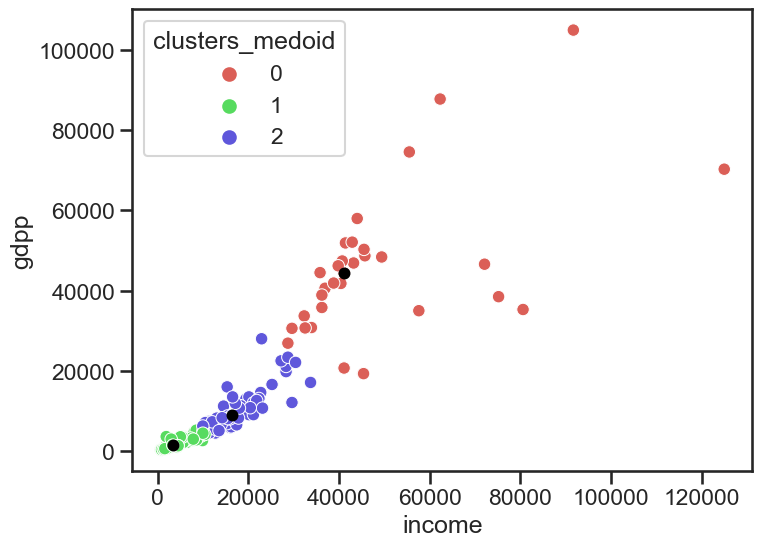

In [81]:
# medoids de cada cluster
medoids = model_raw_medoid.cluster_centers_

#plot dos clusters e seus medoids
plt.figure(figsize = (8,6))
sns.scatterplot(data = country,
                x = X1,
                y = X2,
                hue = country['clusters_medoid'],
                palette = sns.color_palette('hls', 3))
plt.scatter(medoids[:,0],
            medoids[:,1],
            c= 'black',
            s = 50)
plt.show()

In [82]:
# cálculo das distancias para o medoid
cluster_0['dist_medoid'] = (cluster_0[X1]-medoids[0,0])**2 + (cluster_0[X2]-medoids[0,1])**2
cluster_1['dist_medoid'] = (cluster_1[X1]-medoids[0,0])**2 + (cluster_1[X2]-medoids[0,1])**2
cluster_2['dist_medoid'] = (cluster_2[X1]-medoids[0,0])**2 + (cluster_2[X2]-medoids[0,1])**2
index_min_0 = cluster_0['dist_medoid'][cluster_0['dist_medoid'] == cluster_0['dist_medoid'].min()].index
index_min_1 = cluster_1['dist_medoid'][cluster_1['dist_medoid'] == cluster_1['dist_medoid'].min()].index
index_min_2 = cluster_2['dist_medoid'][cluster_2['dist_medoid'] == cluster_2['dist_medoid'].min()].index

In [83]:
print(f"""Os 3 países que representam os cluster nos dados originais são:
Cluster 0: {index_min_0[0]}
Cluster 1: {index_min_1[0]}
Cluster 2: {index_min_2[0]}""")

Os 3 países que representam os cluster nos dados originais são:
Cluster 0: Belgium
Cluster 1: Tunisia
Cluster 2: Slovenia


### É possível notar uma diferença entre os centroids e os medoids. Enquanto enquanto no k-means o centroide não precisa pertencer ao conjunto de dados, no k-medoids o centro é um dos pontos do conjunto, denominado medóide. Dessa forma, o k-medoid é menos sensivel a outlayers, se comparado com K-means. Desde forma, teremos 3 países diferentes para cada cluster. Diferente do k-means, aqui temos 1 país em desenvolvimento, e 2 países desenvolvidos.